In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec

%matplotlib notebook

In [2]:
fname_20 = "./common_signal_timestamping/deb20/icap_channel_3.log"
T0 = np.genfromtxt(fname_20, delimiter=',',dtype='int64')
fname_21 = "./common_signal_timestamping/deb21/icap_channel_3.log"
T1 = np.genfromtxt(fname_21, delimiter=',',dtype='int64')


loc0 = T0[1:,0];
hw0 = T0[1:,1];

loc1 = T1[1:,0];
hw1 = T1[1:,1];


Sample count: 29168
Test duration: 8.530220hours
Mean difference: 40.401330
Difference standard deviation: 78.458160
Maximum absolute difference: 307


(-265.0, 337.0)

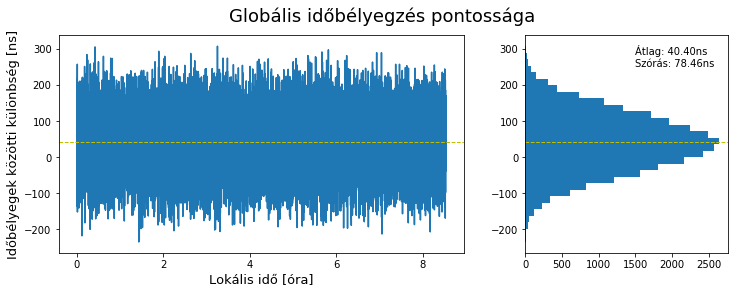

In [3]:

dif = np.array(hw0-hw1,dtype='float');

print "Sample count: %d" % len(dif);
print "Test duration: %fhours" % ((hw0[-1] - hw0[0])*1e-9/60/60)


f = figure(figsize=(12,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
p1 = plt.subplot(gs[0])
p2 = plt.subplot(gs[1])

f.suptitle(u'Globális időbélyegzés pontossága',fontsize=18);

plot_bottom = np.min(dif)-30;
plot_top = np.max(dif)+30;

p1.plot( loc0 * 1e-9 /60 /60, dif);
p1.axhline(np.mean(dif), color='y', linestyle='dashed', linewidth=1)
p1.set_xlabel(u'Lokális idő [óra]',fontsize=13)
p1.set_ylabel(u'Időbélyegek közötti különbség [ns]',fontsize=13);
p1.set_ylim(bottom=plot_bottom,top=plot_top)

print "Mean difference: %f" % np.mean(dif);
print "Difference standard deviation: %f" % np.std(dif)
print "Maximum absolute difference: %d" % np.max(np.abs(dif))

p2.hist(dif,bins=30,orientation='horizontal');
p2.axhline(np.mean(dif), color='y', linestyle='dashed', linewidth=1)
p2.text(1500,250,u'Átlag: %.2fns\nSzórás: %.2fns' % (np.mean(dif), np.std(dif)))
p2.set_ylim(bottom=plot_bottom,top=plot_top)


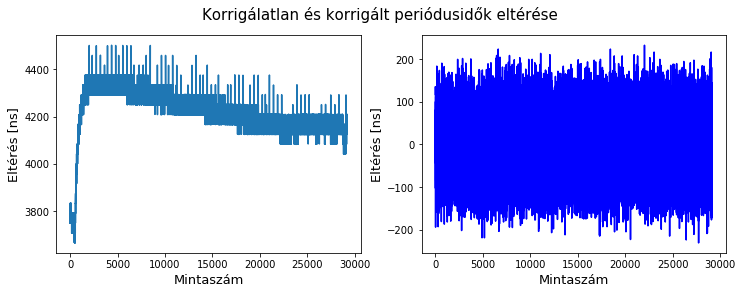

0.00589707546199472
-1054279583
-1054275833
-1054279583
-1054279466


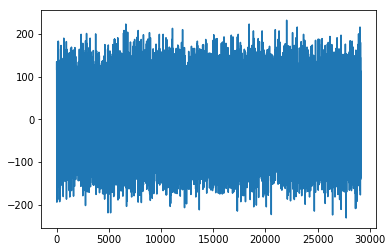

In [4]:
%matplotlib inline
f = figure(figsize=(12,4))
p1 = f.add_subplot(121)
p2 = f.add_subplot(122)

f.suptitle(u'Korrigálatlan és korrigált periódusidők eltérése', fontsize=15)
p1.plot(np.diff(loc0) - np.diff(loc1))
p1.set_xlabel(u'Mintaszám',fontsize=13)
p1.set_ylabel(u'Eltérés [ns]',fontsize=13)
p2.plot(np.diff(hw0) - np.diff(hw1),'b')
p2.set_xlabel(u'Mintaszám',fontsize=13)
p2.set_ylabel(u'Eltérés [ns]',fontsize=13)
show()

plot(np.diff(hw0) - np.diff(hw1))

print np.mean(np.diff(hw0) - np.diff(hw1))

print loc0[0] - loc0[1]
print loc1[0] - loc1[1]

print hw0[0] - hw0[1]
print hw1[0] - hw1[1]

----------------- Node 20 -----------------


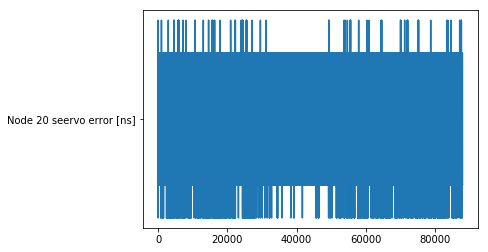

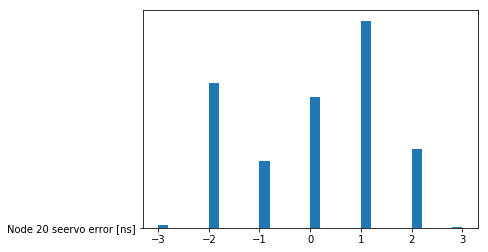

----------------- Node 21 -----------------


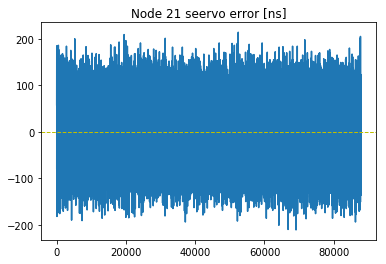

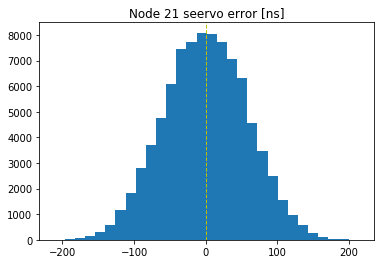

Mean difference: -0.021096 ns
Difference standard deviation: 57.929088 ns
Maximum absolute difference: 214 ns


In [5]:
# get timekeeper statistics
f_tk_20 = "./common_signal_timestamping/deb20/timekeeper.log"
T0 = np.genfromtxt(f_tk_20, delimiter=',',dtype='int64')
f_tk_21 = "./common_signal_timestamping/deb21/timekeeper.log"
T1 = np.genfromtxt(f_tk_21, delimiter=',',dtype='int64')

servo_ptp_20 = T0[10:,0];
servo_local_20 = T0[10:,1];
servo_est_20 = T0[10:,2];
servo_error_20 = np.array(servo_est_20 - servo_ptp_20,dtype='float')
servo_adj_20 = T0[10:,3];

servo_ptp_21 = T1[10:,0];
servo_local_21 = T1[10:,1];
servo_est_21 = T1[10:,2];
servo_error_21 = np.array(servo_est_21 - servo_ptp_21,dtype='float')
servo_adj_21 = T1[10:,3];

print "----------------- Node 20 -----------------"
plot(servo_error_20);
plot("Node 20 seervo error [ns]");
show();
hist(servo_error_20,bins=30);
plot("Node 20 seervo error [ns]");
show()

print "----------------- Node 21 -----------------"
plot(servo_error_21);
axhline(np.mean(servo_error_21), color='y', linestyle='dashed', linewidth=1)
title("Node 21 seervo error [ns]");
show();
hist(servo_error_21,bins=30);
axvline(np.mean(servo_error_21), color='y', linestyle='dashed', linewidth=1)
title("Node 21 seervo error [ns]");
show()

print "Mean difference: %f ns" % np.mean(servo_error_21);
print "Difference standard deviation: %f ns" % np.std(servo_error_21)

print "Maximum absolute difference: %d ns" % np.max(np.abs(servo_error_21))

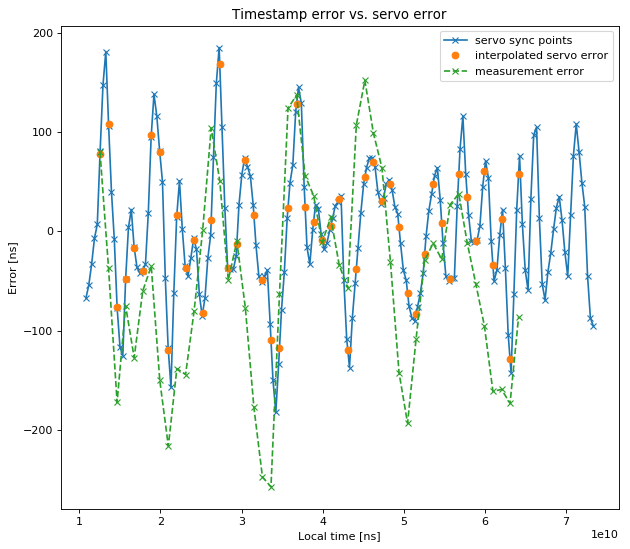

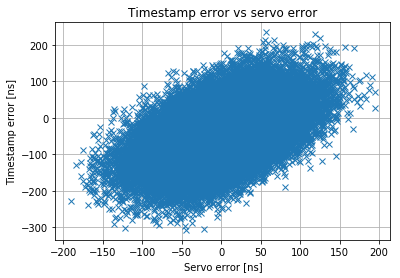

In [6]:
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')

t = loc1;
servo_err_interp = np.interp(t,servo_local_21,servo_error_21)


plot(servo_local_21[20:200],servo_error_21[20:200],'x-', label='servo sync points')
plot(t[0:50],servo_err_interp[0:50],'o',label='interpolated servo error');
plot(loc1[0:50], -dif[0:50],'x--',label='measurement error');
legend()
title('Timestamp error vs. servo error');
xlabel('Local time [ns]');
ylabel('Error [ns]');
show()

plot(servo_err_interp,-dif,'x')
xlabel('Servo error [ns]');
ylabel('Timestamp error [ns]');
title('Timestamp error vs servo error')
grid()


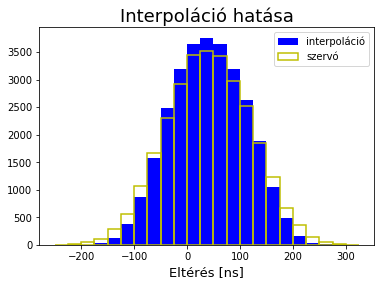

Mean difference: 40.128531 ns
Difference standard deviation: 70.322168 ns
Maximum absolute difference: 283 ns
307.0


In [7]:
# recalculate global times for the icap timestamps using linear interpolation
offset_20 = servo_ptp_20[0]
servo_ptp_rel = np.array(servo_ptp_20 - offset_20,dtype='float64');
glob_int_0 = np.array(np.interp(loc0,servo_local_20,servo_ptp_rel),dtype='int64')
glob_int_0 = glob_int_0 + offset_20;

offset_21 = servo_ptp_21[0]
servo_ptp_rel = np.array(servo_ptp_21 - offset_21,dtype='float64');
glob_int_1 = np.array(np.interp(loc1,servo_local_21,servo_ptp_rel),dtype='int64')
glob_int_1 = glob_int_1 + offset_21;


dif_int = glob_int_0 -glob_int_1
hist(dif_int ,bins=range(-250,350,25),facecolor='b',label=u'interpoláció')
hist(dif ,bins=range(-250,350,25),edgecolor='y',facecolor='none',linewidth=1.5,label=u'szervó')
legend()

#axvline(np.mean(dif_int), color='y', linestyle='dashed', linewidth=1)
title(u'Interpoláció hatása',fontsize=18);
xlabel(u'Eltérés [ns]',fontsize=13)
show()

print "Mean difference: %f ns" % np.mean(dif_int);
print "Difference standard deviation: %f ns" % np.std(dif_int)

print "Maximum absolute difference: %d ns" % np.max(np.abs(dif_int))

print np.max(np.abs(dif))
#plot(servo_err_interp,-dif_int,'x')
#xlabel('Servo error [ns]');
#ylabel('Timestamp error [ns]');
#title('Timestamp error vs servo error')
#grid()

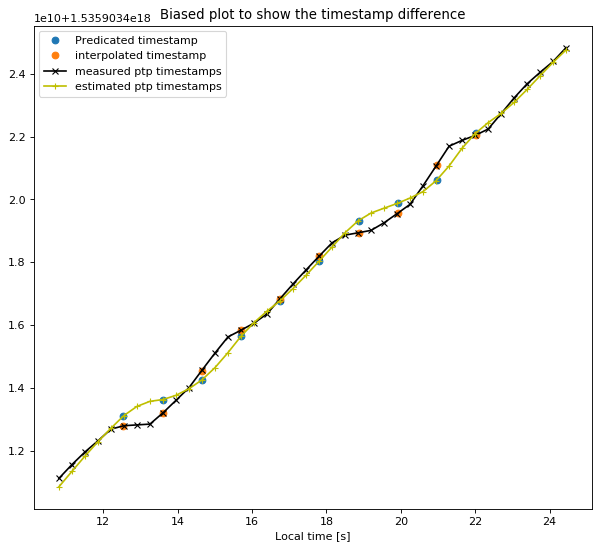

In [8]:
l = loc1[0:10]/1e9;
h = hw1[0:10];
e = glob_int_1[0:10];

ptp_l = servo_local_21[20:60];
ptp_g = servo_ptp_21[20:60];
ptp_e = servo_est_21[20:60];

# cal linear regression
z = ptp_g[0]
m,b = np.polyfit(ptp_l,ptp_g-z,1);

linreg_icap = np.array(m*loc1[0:10]+b,dtype='int64')+z;
linreg_servo = np.array(m*ptp_l+b,dtype='int64')+z;

dh = h - linreg_icap;
de = e - linreg_icap;
dp = ptp_g - linreg_servo;
dpe = ptp_e - linreg_servo;

h2 = linreg_icap +   4000000*dh
e2 = linreg_icap +   4000000*de;
p2 = linreg_servo +  4000000*dp;
pe2 = linreg_servo + 4000000*dpe;


fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')

plot(l,h2,'o',label = 'Predicated timestamp');
plot(l,e2,'o',label='interpolated timestamp');
plot(ptp_l/1e9,p2,'kx-',label='measured ptp timestamps')
plot(ptp_l/1e9,pe2,'y+-',label='estimated ptp timestamps')
title("Biased plot to show the timestamp difference")
xlabel('Local time [s]');
legend();
